# Lesson: Additional Topics - SELENIUM

<a href="https://www.canva.com/design/DAFn0oyFl0E/zaUL66T-KlDpGlKjFVwj7A/view?utm_content=DAFn0oyFl0E&utm_campaign=designshare&utm_medium=link&utm_source=publishsharelink">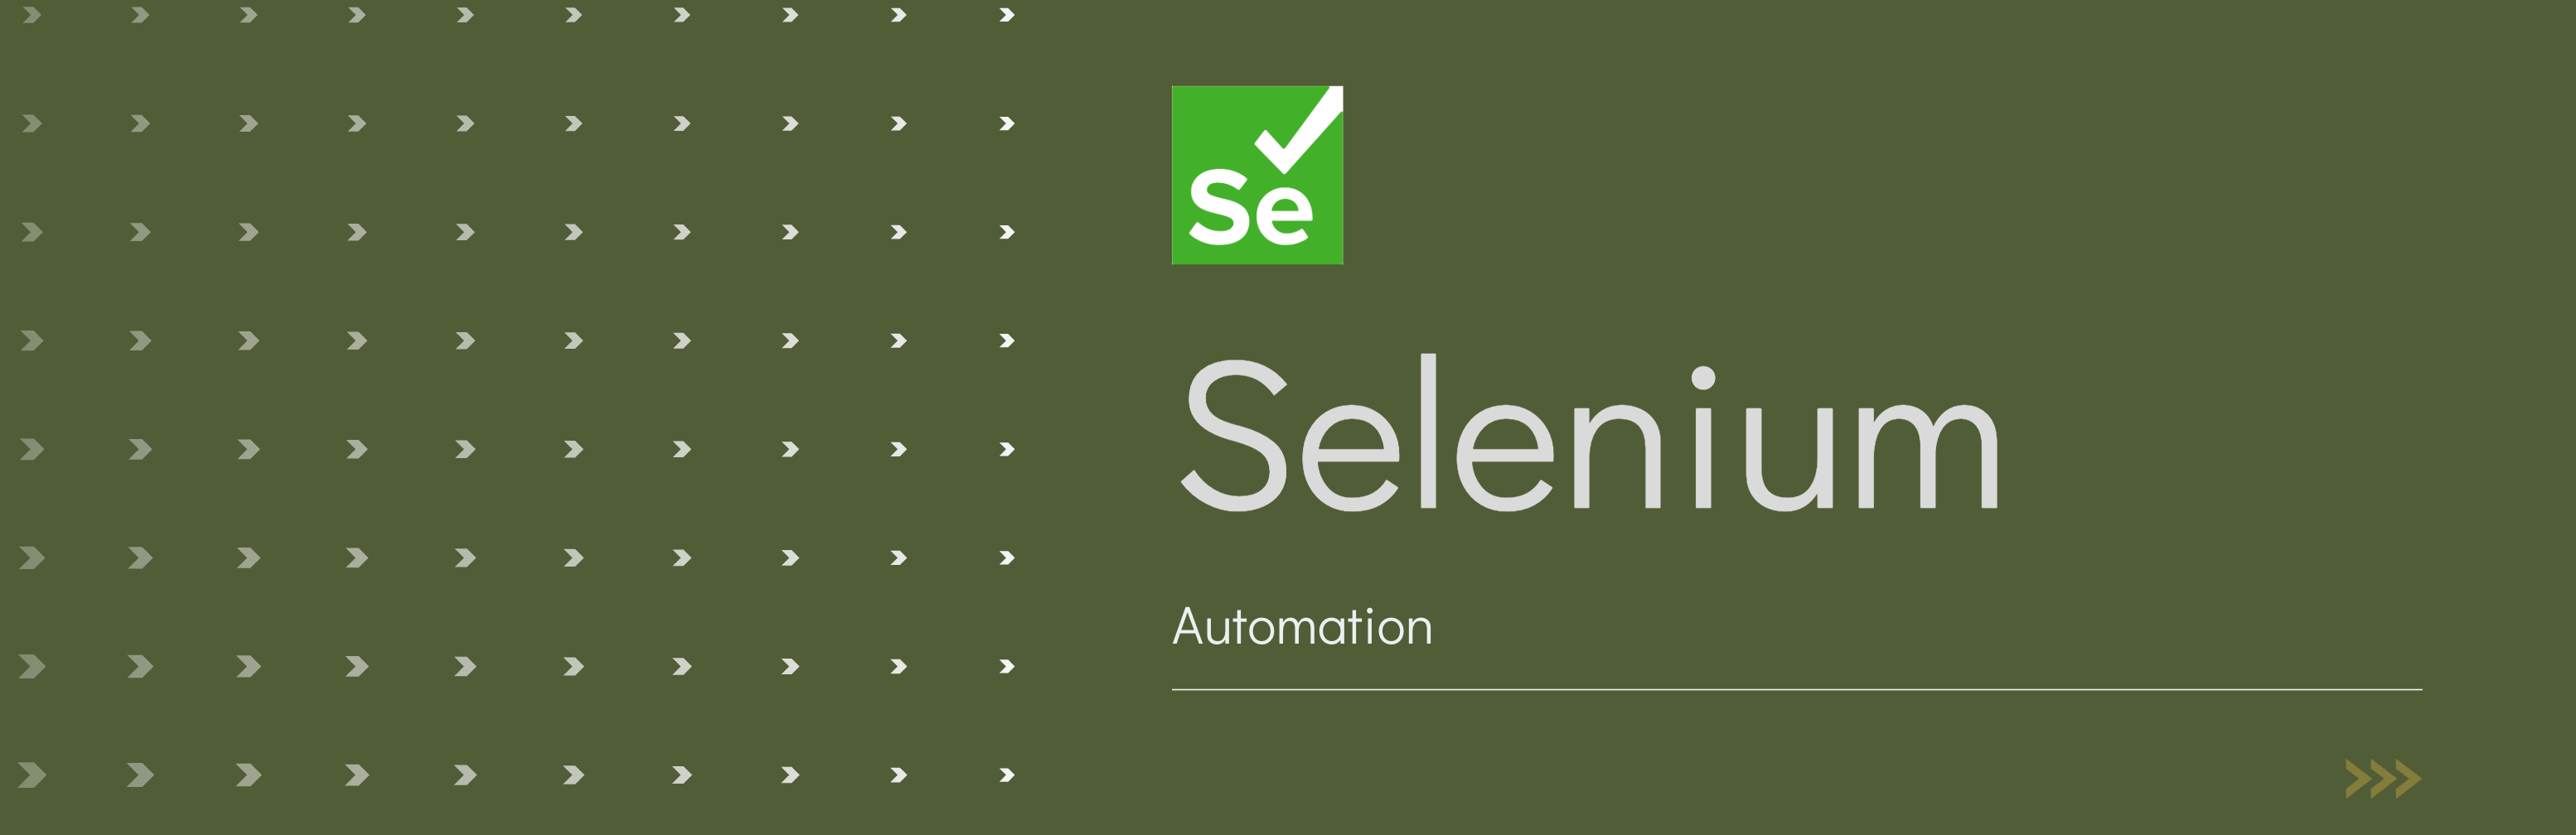</a>

<hr style="border:2px solid gray">

# Terminal Commands

### `pip install selenium`
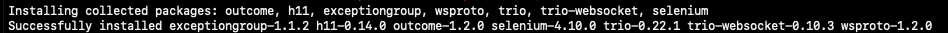

### `pip install webdriver-manager`


### `echo "export githubUSER="`githubUserID`"" >> ~/.zshrc && source ~/.zshrc`

### `echo "export githubPSWD="`Securep@ssw0rd123`"" >> ~/.zshrc && source ~/.zshrc`

#### `printenv githubUSER`
#### `printenv githubPSWD`

## ***Open your ipynb from the terminal session you ran the following commands from to avoid the need to restart your Python session.***
___

# Imports

In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support.ui import Select, WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

from webdriver_manager.chrome import ChromeDriverManager

import time as t
import os


# Variables

In [2]:
user = os.getenv("githubUSER")
pswd = os.getenv("githubPSWD")
                 
base_url = "https://github.com/"
                 

In [3]:
user

'o0amandagomez0o'

In [4]:
# Call ChromeDriverManager().install() to download and install ChromeDriver

ChromeDriverManager().install()

[WDM] - Downloading: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 7.40M/7.40M [00:00<00:00, 16.4MB/s]


'/Users/amandagomez/.wdm/drivers/chromedriver/mac_arm64/114.0.5735.90/chromedriver'

<div class="alert alert-warning" role="alert">

By separating the installation step from the final script, you avoid unnecessary installations and ensure that the ChromeDriver is available for all relevant scripts on the machine.

</div>

In [3]:
# Create a webdriver object 

driver = webdriver.Chrome(service = Service())

<div class="alert alert-warning" role="alert">

This should cause a new Chrome browser to open up.
    
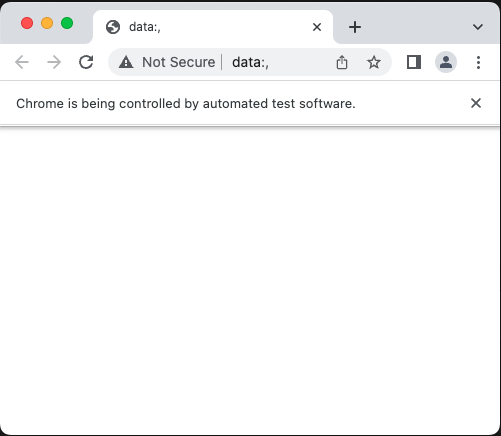
    
</div>

In [4]:
# Let's open up a website!

driver.get(base_url+"login")

In [7]:
# Maximize the page

driver.maximize_window()

In [8]:
# or change the ratio according to pixels

driver.set_window_size(1400,1000)

# <a href = "https://www.selenium.dev/documentation/webdriver/elements/finders/">Finding Web Elements</a>
### Now this is where we can dig into our developer tools that we've used in the past for webscraping!

We'll want to locate where our username and password will be placed into.

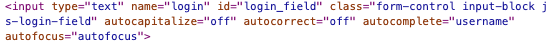




In [9]:
# Get to finding!

driver.find_element(By.NAME, "login").click()
 #Use `click()` to test

# <a href="https://www.selenium.dev/documentation/webdriver/elements/interactions/">Basic Interactions</a>

In [5]:
# Enter username

driver.find_element(By.NAME, "login").send_keys(user)

In [6]:
# Enter password

driver.find_element(By.NAME, "password").send_keys(pswd)

In [7]:
# Locate and click the sign in button

driver.find_element(By.NAME, "commit").click()

In [8]:
# navigate to database-exercises repo

driver.get(base_url+user+"/database-exercises")

# <a href = "https://www.selenium.dev/documentation/webdriver/elements/locators/#xpath">XPath</a>
XPath is commonly used in web scraping and automated testing, especially when working with HTML/XML-based web pages. 

It allows you to locate and extract specific elements or data from the page by targeting their XPath expressions.

Let's use <a href = "https://scrapinghub.github.io/xpath-playground/">XPath Playground</a> to help us locate our repo links!

In [9]:
driver.find_elements(By.XPATH, "//a[@class='js-navigation-open Link--primary']")

[<selenium.webdriver.remote.webelement.WebElement (session="d099ca02a39ffef4b121f152805420a9", element="387625082AC2A3A609B507F223BB6CCD_element_29")>,
 <selenium.webdriver.remote.webelement.WebElement (session="d099ca02a39ffef4b121f152805420a9", element="387625082AC2A3A609B507F223BB6CCD_element_30")>,
 <selenium.webdriver.remote.webelement.WebElement (session="d099ca02a39ffef4b121f152805420a9", element="387625082AC2A3A609B507F223BB6CCD_element_31")>,
 <selenium.webdriver.remote.webelement.WebElement (session="d099ca02a39ffef4b121f152805420a9", element="387625082AC2A3A609B507F223BB6CCD_element_32")>,
 <selenium.webdriver.remote.webelement.WebElement (session="d099ca02a39ffef4b121f152805420a9", element="387625082AC2A3A609B507F223BB6CCD_element_33")>,
 <selenium.webdriver.remote.webelement.WebElement (session="d099ca02a39ffef4b121f152805420a9", element="387625082AC2A3A609B507F223BB6CCD_element_34")>,
 <selenium.webdriver.remote.webelement.WebElement (session="d099ca02a39ffef4b121f1528054

In [12]:
# I don't want the readme, so let's skip [0]

driver.find_elements(By.XPATH, "//a[@class='js-navigation-open Link--primary']")[0].text

'README.md'

In [9]:
#select first sql file

driver.find_elements(By.XPATH, "//a[@class='js-navigation-open Link--primary']")[1].click()

In [15]:
# download the file
# CMD + F in developer tool

driver.find_elements(By.XPATH, "//button[@data-component='IconButton']")[5]

<selenium.webdriver.remote.webelement.WebElement (session="d099ca02a39ffef4b121f152805420a9", element="07C754094BB45FD477F0D5A021F70B47_element_294")>

# <a href="https://www.selenium.dev/documentation/webdriver/actions_api/">Action Chains</a>

In [11]:
# download the file
# Check if this is the correct button by hovering over it
dlbutton = driver.find_elements(By.XPATH, "//button[@data-component='IconButton']")[5]

ActionChains(driver).move_to_element(dlbutton).perform()

In [12]:
# Check if this is the correct button by hovering over it

ActionChains(driver).move_to_element(driver.find_elements(By.XPATH, "//span[@role='tooltip']")[1]).perform()

They both point to our download button, we can use either!

In [13]:
# download the file

#driver.find_elements(By.XPATH, "//button[@data-component='IconButton']")[5].click()
dlbutton.click()

#### Notice that the new page we were directed to has our exercise links listed on the side, if we wanted to repeat the process, we wouldn't necessarily need to go back to the main `database-exercises` repo page...

# <a href="https://www.selenium.dev/documentation/webdriver/waits/">Waits</a>
Waits are useful for when you need to allow the webpage time to load. I'm going to use an ipynb that I know usually takes a long time to load for demo purposes.

- Implicit: sets a maximum amount of time for the WebDriver to wait for an element to appear. 

- Explicit: allows you to specify a condition and maximum waiting time for a *specific* element to become available. 

In [14]:
driver.get("https://github.com/o0amandagomez0o/individual_project/blob/master/final_aac.ipynb")

In [15]:
#check if ipynb is selected using a right-click
#explicit
ipynb = WebDriverWait(driver, 50).until(EC.presence_of_element_located((By.XPATH, "//html")))
ActionChains(driver).context_click(ipynb).perform()

In [16]:
# reload pg
driver.get("https://github.com/o0amandagomez0o/individual_project/blob/master/final_aac.ipynb")

In [17]:
#implicit wait
driver.implicitly_wait(15)
ActionChains(driver).context_click(driver.find_element(By.XPATH, "//html")).perform()

In [18]:
# Waits differ from sleep timers
t.sleep(5)
ActionChains(driver).context_click(driver.find_element(By.XPATH, "//html")).perform()

# <a href = "https://www.selenium.dev/selenium/docs/api/py/webdriver_chrome/selenium.webdriver.chrome.webdriver.html?highlight=close#selenium.webdriver.chrome.webdriver.WebDriver.close">Closing</a> & <a href="https://www.selenium.dev/selenium/docs/api/py/webdriver_chrome/selenium.webdriver.chrome.webdriver.html?highlight=quit#selenium.webdriver.chrome.webdriver.WebDriver.quit">Quitting</a>

`.close()` is used to close the current browser window or tab, while `.quit()` is used to close all browser windows or tabs associated with the WebDriver and terminate the WebDriver session. 

In [19]:
driver.switch_to.new_window('window')

In [20]:
# closes the current window
driver.close()

In [21]:
driver.quit()

# Your Turn!

1. Make a function that will download all of the sql files listed in your `database-exercises` repo.

2. Pick one more repo to download all ipynb's (**only**) from and turn that into a second function. 

**BONUS**: turn this functions into a py script you can run directly in terminal.